In [2]:
import string

from collections import Counter

import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

import nltk

import warnings
warnings.filterwarnings('ignore')

In [3]:

text = open('apj.txt', encoding="utf-8").read()

lower_case = text.lower() 

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

tokenized_words = word_tokenize(cleaned_text, "english")


In [4]:
cleaned_text

'dr apj abdul kalams involvement in the nuclear power in india earned him the title missile man of india due to his contribution the government of india awarded him the highest civilian award \n\nlet us tell you that union minister for information and broadcasting prakash javadekar released the first look of the biopic of dr apj abdul kalam in new delhi on 9 february 2020 the title of the film is apj abdul kalam the missile man it is a joint venture between hollywood and telugu film industry and will release by the end of 2020 \n\ndr apj abdul kalam was born on 15 october 1931 his birth anniversary is observed as world students day he was the president of india from 2002 to 2007 he was honoured with several prestigious awards including indias highest civilian honour bharat ratna in 1997 he was born in dhanushkodi rameswaram tamil nadu and studied physics and aerospace engineering\n\nname avul pakir jainulabdeen abdul kalam dr apj abdul kalam\n\nnick name missile man\n\nnationality indi

In [5]:
# Removing Stop Words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [6]:
final_words

['dr',
 'apj',
 'abdul',
 'kalams',
 'involvement',
 'nuclear',
 'power',
 'india',
 'earned',
 'title',
 'missile',
 'man',
 'india',
 'due',
 'contribution',
 'government',
 'india',
 'awarded',
 'highest',
 'civilian',
 'award',
 'let',
 'us',
 'tell',
 'union',
 'minister',
 'information',
 'broadcasting',
 'prakash',
 'javadekar',
 'released',
 'first',
 'look',
 'biopic',
 'dr',
 'apj',
 'abdul',
 'kalam',
 'new',
 'delhi',
 '9',
 'february',
 '2020',
 'title',
 'film',
 'apj',
 'abdul',
 'kalam',
 'missile',
 'man',
 'joint',
 'venture',
 'hollywood',
 'telugu',
 'film',
 'industry',
 'release',
 'end',
 '2020',
 'dr',
 'apj',
 'abdul',
 'kalam',
 'born',
 '15',
 'october',
 '1931',
 'birth',
 'anniversary',
 'observed',
 'world',
 'students',
 'day',
 'president',
 'india',
 '2002',
 '2007',
 'honoured',
 'several',
 'prestigious',
 'awards',
 'including',
 'indias',
 'highest',
 'civilian',
 'honour',
 'bharat',
 'ratna',
 '1997',
 'born',
 'dhanushkodi',
 'rameswaram',
 'tami

In [7]:


lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [8]:
lemma_words

['dr',
 'apj',
 'abdul',
 'kalams',
 'involvement',
 'nuclear',
 'power',
 'india',
 'earned',
 'title',
 'missile',
 'man',
 'india',
 'due',
 'contribution',
 'government',
 'india',
 'awarded',
 'highest',
 'civilian',
 'award',
 'let',
 'u',
 'tell',
 'union',
 'minister',
 'information',
 'broadcasting',
 'prakash',
 'javadekar',
 'released',
 'first',
 'look',
 'biopic',
 'dr',
 'apj',
 'abdul',
 'kalam',
 'new',
 'delhi',
 '9',
 'february',
 '2020',
 'title',
 'film',
 'apj',
 'abdul',
 'kalam',
 'missile',
 'man',
 'joint',
 'venture',
 'hollywood',
 'telugu',
 'film',
 'industry',
 'release',
 'end',
 '2020',
 'dr',
 'apj',
 'abdul',
 'kalam',
 'born',
 '15',
 'october',
 '1931',
 'birth',
 'anniversary',
 'observed',
 'world',
 'student',
 'day',
 'president',
 'india',
 '2002',
 '2007',
 'honoured',
 'several',
 'prestigious',
 'award',
 'including',
 'india',
 'highest',
 'civilian',
 'honour',
 'bharat',
 'ratna',
 '1997',
 'born',
 'dhanushkodi',
 'rameswaram',
 'tamil',


In [9]:
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            
print("People emotions from the text \n", emotion_list, '\n \n')


w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' happy', ' happy', ' lost', ' free', ' esteemed', ' independent', ' average'] 
 

Count of each emotion 
 Counter({' happy': 2, ' lost': 1, ' free': 1, ' esteemed': 1, ' independent': 1, ' average': 1})


In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vikash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
# Test how SentimentIntensityAnalyzer works
sia = SentimentIntensityAnalyzer()

print (sia.polarity_scores(cleaned_text))

{'neg': 0.039, 'neu': 0.891, 'pos': 0.07, 'compound': 0.9646}


In [15]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
    else:
        print("Neutral Sentiment")


     ******Positive Sentiment*******


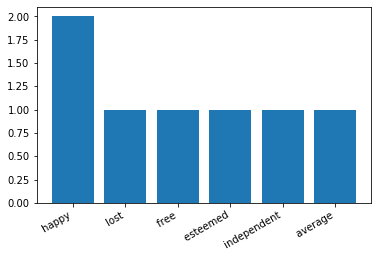

In [16]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()